     sample supergroup  hifi_cov
6   HG00512        EUR      30.8
11  HG00171        EUR      37.5
13  HG01114        EUR      35.8
14  HG02018        EUR      37.3
15  NA19036        EUR      35.9
16  NA12329        EUR      38.0
20  HG02492        EUR      37.1
24  NA18534        EUR      38.8
25  HG01505        EUR      35.7
28  HG00864        EUR      34.2
29  NA20847        EUR      29.8
31  HG00096        EUR      37.6
32  HG01596        EUR      39.5
34  HG02818        EUR      38.0
36  HG02059        EUR      38.3
37  NA19434        EUR      28.7
38  HG04217        EUR      37.0
39  HG03807        EUR      38.5
40  NA19836        EUR      33.5
41  HG02106        EUR      37.4
42  HG00268        EUR      38.3
43  NA20355        EUR      38.3
44  NA19129        EUR      35.6
45  HG02769        EUR      39.6
46  HG03452        EUR      33.2
50  HG02953        EUR      39.8
53  NA19331        EUR      34.0
62  NA19705        EUR      39.8
63  HG03456        EUR      38.1
     sampl

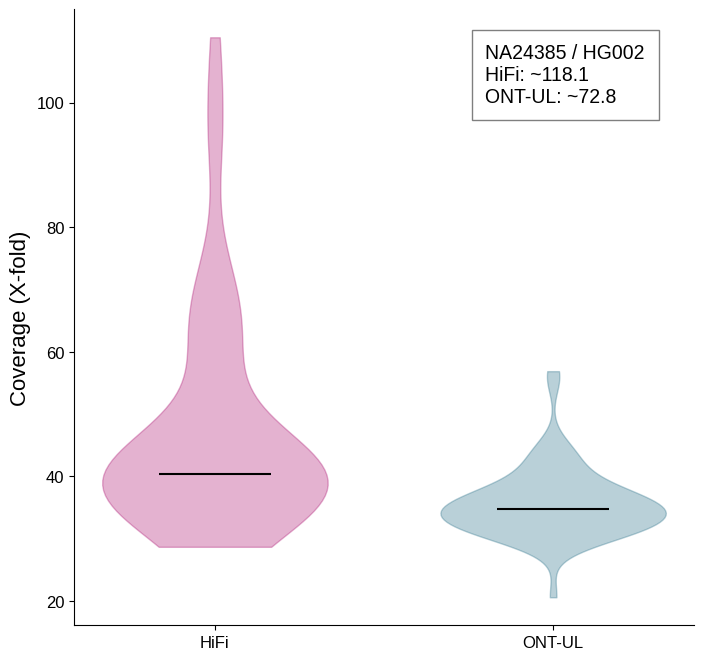

In [2]:
%run "../../00_project_config.ipynb"
%run "../../05_plot_config.ipynb"

_MYNAME="input-read-summary"
_MYSTAMP=get_nb_stamp(_MYNAME)

_MY_OUT_PATH = PLOT_OUT_MAIN_FIG1.joinpath("panels")

import matplotlib.pyplot as plt

def make_scatter(stat1, label1, stat2, label2):
    """NA24385/HG002 is excluded as data point
    b/c all data are external and its input
    coverage distorts the plot quite a bit.
    """
    
    assert HGSVC_SAMPLES.shape[0] == HGSVC_TOTAL

    sub = HGSVC_SAMPLES.loc[HGSVC_SAMPLES["sample"] != "NA24385", :].copy()
    
    xvals = sub[stat1].values
    yvals = sub[stat2].values
    colors = sub["rgb_rel_super"].values
    colors = [tupleize(color) for color in colors]
    
    fig, ax = plt.subplots(figsize=(8,8))
    
    ax.scatter(
        xvals,
        yvals,
        c=colors,
        marker=GENERIC_MARKER
    )
    
    ax.set_xlabel(label1)
    ax.set_ylabel(label2)
    
    #pop_legend = get_pop_legend()
    #ax.legend(handles=pop_legend, loc="best")
    
    return


def make_violin(stat1, label1, color1, stat2, label2, color2, ylabel, add_target=False, isolate=None):
    """NA24385/HG002 is excluded as data point
    b/c all data are external and its input
    coverage distorts the plot quite a bit.
    """
    
    assert HGSVC_SAMPLES.shape[0] == HGSVC_TOTAL

    if isolate is not None:   
        sub = HGSVC_SAMPLES.loc[HGSVC_SAMPLES["sample"] != isolate, :].copy()
        iso_val1 = HGSVC_SAMPLES.loc[HGSVC_SAMPLES["sample"] == isolate, stat1].iloc[0]
        iso_val2 = HGSVC_SAMPLES.loc[HGSVC_SAMPLES["sample"] == isolate, stat2].iloc[0]
    else:
        sub = HGSVC_SAMPLES

    vals_left = sub[stat1].values
    vals_right = sub[stat2].values

    fig, ax = plt.subplots(figsize=(8,8))

    x_pos = [1, 1.75]
    
    components = ax.violinplot(
        [vals_left, vals_right],
        x_pos,
        vert=True,
        showmedians=True,
        showmeans=False,
        showextrema=False,
        widths=[0.5, 0.5]
    )
    bodies1, bodies2 = components["bodies"]
    medians = components["cmedians"]
    medians.set_color("black")

    bodies1.set_facecolor(color1)
    bodies1.set_edgecolor(color1)

    bodies2.set_facecolor(color2)
    bodies2.set_edgecolor(color2)

    if add_target:
        hifi_target = 40
        ontul_target = 30

        ax.axhline(hifi_target, 0, 0.25, ls="dotted", lw=2, color="grey")
        ax.axhline(ontul_target, 0, 0.85, ls="dotted", lw=2, color="grey")

    ax.set_xticks(x_pos)
    ax.set_xticklabels([label1, label2])

    ax.set_ylabel(ylabel)

    if isolate is not None:
        # manual fix
        if isolate == "NA24385":
            text = f"{isolate} / HG002\n{label1}: ~{iso_val1}\n{label2}: ~{iso_val2}"
        else:
            text = f"{isolate}\n{label1}: ~{iso_val1}\n{label2}: ~{iso_val2}"
        ax.text(
            1.6, 100, text, fontsize=14,
            bbox=dict(facecolor='none', edgecolor='black', pad=10.0, alpha=0.5)
        )
    
    return fig, ax
    


print(HGSVC_SAMPLES.loc[HGSVC_SAMPLES["hifi_cov"] < 40, ["sample", "supergroup", "hifi_cov"]])
print(HGSVC_SAMPLES.loc[HGSVC_SAMPLES["ontul_cov"] < 30, ["sample", "supergroup", "hifi_cov", "ont_cov", "ontul_cov"]])   
    
#_ = make_scatter("hifi_cov", "HiFi coverage (X-fold)", "ont_cov", "ONT coverage (X-fold)")
#_ = make_scatter("hifi_cov", "HiFi coverage (X-fold)", "ontul_cov", "ONT-UL coverage (X-fold)")
#_ = make_scatter("hifi_n50", "HiFi read length N50 (kbp)", "ont_n50", "ONT read length N50 (kbp)")

figure, axes = make_violin("hifi_cov", "HiFi", PACBIO_COLOR, "ontul_cov", "ONT-UL", ONT_COLOR, "Coverage (X-fold)", False, "NA24385")

for ext in ["png", "svg", "pdf", "pck"]:
    out_path = _MY_OUT_PATH.joinpath(f"fig1_panel_read-cov.{ext}")
    if ext == "pck":
        save_figure(out_path, axes)
    else:
        save_figure(out_path, figure)
